In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

dataset_x_train = np.load('pre_processing/tracks/X_y_EU_1h/X_train_2D.npy')
dataset_x_test = np.load('pre_processing/tracks/X_y_EU_1h/X_test_2D.npy')
dataset_x_validation = np.load('pre_processing/tracks/X_y_EU_1h/X_validation_2D.npy')
dataset_y_train = np.load('pre_processing/tracks/X_y_EU_1h/y_train_2D.npy')
dataset_y_test = np.load('pre_processing/tracks/X_y_EU_1h/y_test_2D.npy')
dataset_y_validation = np.load('pre_processing/tracks/X_y_EU_1h/y_validation_2D.npy')

# import the list of variables names
variables = pd.read_csv('data/variable_list_80_mean.csv')
# remove the row with the name 'instantaneous_10m_wind_gust'
variables = variables.drop(variables[variables['variables'] == 'instantaneous_10m_wind_gust'].index)

In [13]:
# combine the x datasets together

dataset_x = np.concatenate((dataset_x_train, dataset_x_test, dataset_x_validation), axis=0)

# convert the dataset_x to a pandas dataframe

dataset_x = pd.DataFrame(dataset_x)

# add the column names to the dataset_x

dataset_x.columns = variables['variables']

In [ ]:
# standardize the dataset_x

scaler = StandardScaler()
dataset_x_scaled = scaler.fit_transform(dataset_x)

In [29]:
# apply PCA
#pca = PCA(n_components=2)  # You can specify the number of components you want
pca = PCA()
principal_components = pca.fit_transform(dataset_x_scaled)

# convert PCA results to a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=variables['variables'])

# Explained variance
explained_variance = pca.explained_variance_ratio_

print("Principal Components:\n", pca_df)
print("\nExplained Variance by Component:", explained_variance)

Principal Components:
 variables  10m_u_component_of_wind  10m_v_component_of_wind  \
0                        10.317740                 0.559655   
1                         9.194191                 0.501702   
2                        10.058243                 0.356698   
3                        10.769494                 0.628805   
4                        11.332865                 0.468925   
...                            ...                      ...   
6786                      3.249280                 0.715402   
6787                      2.762685                 1.061167   
6788                      1.141882                 0.584389   
6789                      0.312382                 0.181135   
6790                     -0.937558                -0.394002   

variables  2m_dewpoint_temperature  2m_temperature  \
0                        -1.660196        1.547215   
1                        -1.613915        1.595173   
2                        -2.221678        1.365395   
3   

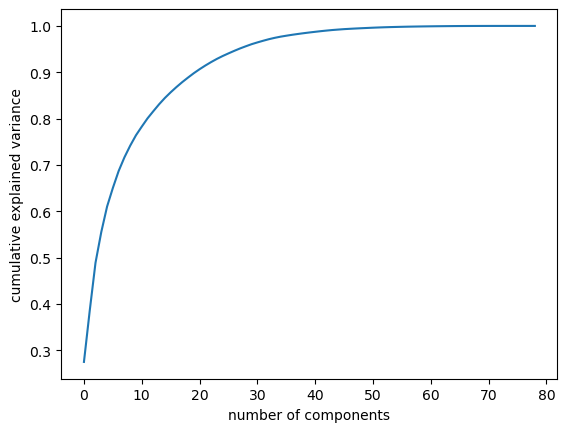

In [30]:
# plot the explained variance
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [36]:
# select the number of component to keep 90% of the variance

n_components = 79 #np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.9) + 1

loading_matrix = pca.components_[:n_components]
# Create a DataFrame to easily identify the contributions
feature_contributions = pd.DataFrame(
    loading_matrix.T,  # Transpose to have features as rows
    columns=[f'PC{i+1}' for i in range(n_components)],  # Name the components as columns
    index=dataset_x.columns  # Original feature names as index
)

# Find the top contributing features to each component
top_features = {}
for i in range(n_components):
    component = f'PC{i+1}'
    top_features[component] = feature_contributions[component].abs().nlargest(10).index.tolist()

# Display the top features
top_features

{'PC1': ['total_precipitation',
  'mean_total_precipitation_rate',
  'vertical_velocity_700',
  'vertical_velocity_600',
  'mean_large_scale_precipitation_rate',
  'large_scale_precipitation',
  'vertical_velocity_500',
  'vertical_velocity_800',
  'specific_rain_water_content_975',
  'specific_rain_water_content_1000'],
 'PC2': ['relative_humidity_50',
  'relative_humidity_70',
  'relative_humidity_100',
  'relative_humidity_150',
  'relative_humidity_30',
  'relative_humidity_20',
  'geopotential_500',
  'relative_humidity_200',
  'relative_humidity_250',
  'mean_top_net_long_wave_radiation_flux'],
 'PC3': ['mean_surface_net_long_wave_radiation_flux',
  'relative_humidity_850',
  'relative_humidity_900',
  'relative_humidity_800',
  'relative_humidity_925',
  'relative_humidity_950',
  'relative_humidity_1000',
  'relative_humidity_975',
  'relative_humidity_700',
  'relative_humidity_600'],
 'PC4': ['relative_humidity_200',
  'relative_humidity_250',
  'relative_humidity_150',
  're